## 소상공인시장진흥공단 상가업소정보로 프랜차이즈 입점분석

### 다루는 내용
* 데이터 요약하기
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화 이해하기

### 실습
* 배스킨라빈스와 던킨도너츠가 근처에 입점되어있는지 확인
* Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현하면서 파이썬의 여러 도구들에 익숙해 지기



## 필요한 라이브러리 불러오기

In [2]:
# pandas, numpy, seaborn을 불러옵니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 시각화를 위한 한글 폰트 설정하기

In [4]:
plt.rc('font', family='Malgun Gothic')

In [13]:
# 폰트가 선명하게 보이도록 설정

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina') # 선명하게
plt.rc('axes', unicode_minus=False)

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_31192/759910585.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina') # 선명하게


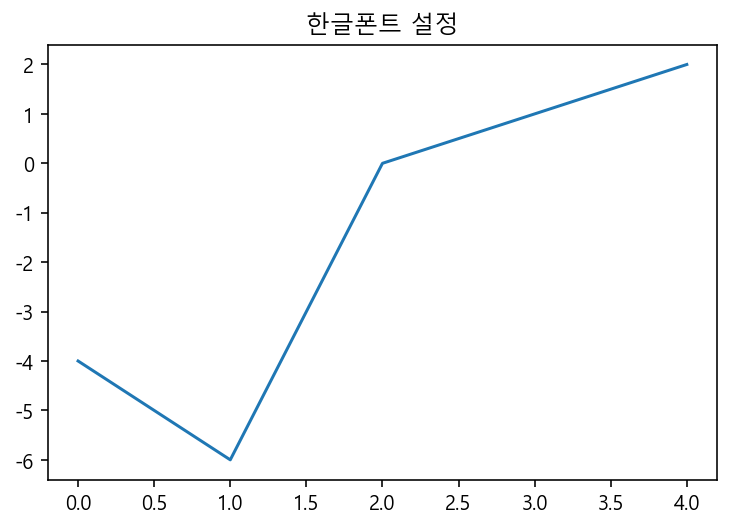

In [14]:
# 한글폰트와 마이너스 폰트 설정 확인

plt.title('한글폰트 설정')
plt.plot([-4,-6,0,1,2]) # 마이너스가 깨져서 나옴

## 데이터 불러오기

In [63]:
# 파일을 불러와 df 라는 변수에 담습니다.

df=pd.read_csv('상가업소정보_201912_01.csv', sep='|') # 파이프로 나눠져 있는 데이터라 오류가 생김 ! 
# 쉼표로 나눠져 있지 않아서
df.head()

# 파이프로 나누도록

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 1: invalid start byte

### 데이터 크기 보기

In [20]:
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.

df.shape()


NameError: name 'df' is not defined

### info 보기

In [22]:
# info 를 사용하면 데이터의 전체적인 정보를 볼 수 있습니다.
# 데이터의 사이즈, 타입, 메모리 사용량 등을 볼 수 있습니다.

df.info()

# 어떤 것이 있는지 확인하고 전처리하는 것이 순서

NameError: name 'df' is not defined

### 결측치 보기

In [24]:
# isnull() 을 사용하면 데이터의 결측치를 볼 수 있습니다.
# 결측치는 True로 값이 있다면 False로 표시되는데 True 는 1과 같기 때문에 
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있습니다.
# mean()을 사용하면 결측치의 비율을 볼 수 있습니다. 

df.isnull().sum() # 얼마나 있는지 확인하고 싶다면 sum()

df.isnull().mean().plot.barh(figsize=(7,9)) # 얼마나 있는지 비율을 보고 싶다면

# bath : 가로로 보기 위함 

NameError: name 'df' is not defined

### 사용하지 않는 컬럼 제거하기

In [25]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.
# 여기에서는 사용할 컬럼만 따로 모아서 사용합니다.

columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도'] # 사용할 부분 < 삭제할 부분 -> 사용할 것만 살리기

print(df.shape)
df=df[columns].copy() # 똑같이 copy해서 df에 넣어준다

df.shape # 11개로 수정되었음을 알 수 있음

NameError: name 'df' is not defined

In [26]:
# 제거 후 메모리 사용량 보기

df.info()

# 메모리도 삭제되었음을 볼 수 있음 -> 메모리를 줄여서 코드 돌리는 시간 단축이 가능

NameError: name 'df' is not defined

## 색인으로 서브셋 가져오기
### 서울만 따로 보기

In [28]:
.# 시도명이 서울로 시작하는 데이터만 봅니다.
# 또, df_seoul 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.

# 원래 데이터는 서울+부산 데이터

# copy를 쓰는 이유는 원문 데이터를 없애고 싶지 않기 때문에

df_seoul=df[df['시도명']=='서울특별시'].copy()
print(df_seoul.shape) 

df_seoul.head()

# 마찬가지로 가짓수가 줄었음을 확인할 수 있음

NameError: name 'df' is not defined

In [29]:
# unique 를 사용하면 중복을 제거한 시군구명을 가져옵니다. 
# 그리고 shape로 갯수를 출력해 봅니다.

df_seoul.['시군구청'].unique()

SyntaxError: invalid syntax (CreatorTemp/ipykernel_31192/2572379740.py, line 4)

In [ ]:
# nunique 를 사용하면 중복을 제거한 시군구명의 갯수를 세어줍니다.

df_seoul.['시군구청'].nunique()

# 몇개인지 세고 싶으면 n만 붙여주기

## 파일로 저장하기
* 전처리한 파일을 저장해 두면 재사용을 할 수 있습니다.
* 재사용을 위해 파일로 저장합니다.

In [36]:
# "seoul_open_store.csv" 라는 이름으로 저장합니다.

df_seoul.to_csv("seoul_open_store.csv", index=False)

# 맨 앞에 생긴 쉼표 -> 자동으로 인덱스값이 생기게 됨
# 번호가 싫다면 False 처리

NameError: name 'df_seoul' is not defined

In [31]:
# 제대로 저장이 되었는지 같은 파일을 불러와서 확인합니다.

pd.read_csv("seoul_open_store.csv").head()

FileNotFoundError: [Errno 2] No such file or directory: 'seoul_open_store.csv'

## 배스킨라빈스, 던킨도너츠 위치 분석

### 특정 상호만 가져오기
* 여기에서는 배스킨라빈스와 던킨도너츠 상호를 가져와서 실습합니다.
* 위에서 pandas의 str.conatains를 활용해 봅니다. 
* 상호명에서 브랜드명을 추출합니다.
* 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
* 오타를 방지하기 위해 배스킨라빈스의 영문명은 baskinrobbins, 던킨도너츠는 dunkindonuts 입니다.

In [33]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.

# 각자 베스킨라빈스를 쓰는 방법이 다를거라 걸러내보는 작업을 해볼 것임

# df_seoul['상호명'].str.lower() # 모두 소문자로 바꿔주는 메서드 
# df_seoul
# # 그대로인 이유는 바꾼 것을 저장하지 않았기 때문에

# df_seoul=df_seoul['상호명'].str.lower() # 원본 데이터에 저장

# # 근데 원본 데이터를 건들이는 건 좋지 않다

df_seoul=df_seoul['상호명_소문자'].str.lower()

# !!! 원본 데이터를 함부로 건들이지 말 것 !!! 
df_seoul.head()


NameError: name 'df_seoul' is not defined

In [40]:
#str.extract 사용해보자

# df_seoul=[df_seoul['상호명_소문자'].str.extract('(배|베)스킨라빈스|baskinrobbins')][0].values.count().sum()

# 몇개가 있는지 세고 싶을 때

NameError: name 'df_seoul' is not defined

In [41]:
# baskinrobbins 를 "상호명_소문자" 컬럼으로 가져옵니다.
# 띄어쓰기 등의 다를 수 있기 때문에 앞글자 baskin 만 따서 가져오도록 합니다.
# '상호명_소문자'컬럼으로 '배스킨라빈스|baskin' 를 가져와 갯수를 세어봅니다.
# loc[행]
# loc[행, 열]

df_seoul=[df_seoul['상호명_소문자'].str.contains('baskinrobbins')]
# df_seoul=[df_seoul['상호명_소문자'].str.contains('(배|베)스킨라빈스|baskinrobbins')]
df_seoul=[df_seoul['상호명_소문자'].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins')]

# df_seoul 로 감싼 이유는 데이터 프레임 형식으로 보고 싶어서

# str.extrsct 함수를 권장 - contains 도 오류는 아님

NameError: name 'df_seoul' is not defined

In [ ]:
# 상호명에서 던킨도너츠만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
# 던킨|dunkin 의 "상호명_소문자"로 갯수를 세어봅니다.

df_seoul=df_seoul.loc[df_seoul['상호명_소문자'].str.contains('던킨|dunkin'), '상호명_소문자'].shape() 

# 앞에 loc는 열만 뒤에 shape은 개수를 
# 보여주는 것은 상호명_소문자만 보여줘라 

In [43]:
# '상호명_소문자'컬럼으로  '배스킨|베스킨|baskin|던킨|dunkin'를 가져와 df_31 변수에 담습니다.

df_31=df_seoul[df_seoul['상호명_소문자'].str.contains('배스킨|베스킨|baskin|던킨|dunkin')].copy()
df_31.shape

NameError: name 'df_seoul' is not defined

In [ ]:
# ~은 not을 의미합니다. 베스킨라빈스가 아닌 데이터를 찾을 때 사용하면 좋습니다.
# 아래 코드처럼 결측치를 던킨도너츠로 채워줘도 괜찮습니다.

df_31.loc[df_31['상호명_소문자'].str.contains('베스킨라빈스|배스킨라빈스|baskinrabbins'),
         "브랜드명"]='배스킨라빈스'
df_31[['상호명'. '브랜드명']].head()

# 브랜드명이라는 col을 추가해서 거기에는 배스킨라빈스로 통일해서 적어라

In [ ]:
# 'df_31에 담긴 상호명','브랜드명'으로 미리보기를 합니다.
# df_31.loc[~df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), 
#           "브랜드명"]

df_31['브랜드명']=df_31['브랜드명'].fillna('던킨도너츠')

# fillna : 결측치를 던킨도너츠로 채우라는 함수

In [44]:
# 데이터가 제대로 모아졌는지 확인합니다.
# "상권업종대분류명"을  value_counts 를 통해 빈도수를 계산합니다.

df_31['상권업종대분류명'].value_counts()

# 소매, 생활서비스가 들어가 있음을 볼 수 있음

NameError: name 'df_31' is not defined

In [ ]:
# "상권업종대분류명"컬럼에서 isin 기능을 사용해서 "소매", "생활서비스" 인 데이터만 가져옵니다.

df_31[df_31['상권업종대분류명'].isin(['소매','생활서비스'])]

# 이러면 데이터 프레임 형태로 나옴 -> ** 포스팅

In [47]:
# "상권업종대분류명"에서 "소매", "생활서비스"는 제외합니다.

df_31=df_31[~df_31['상권업종대분류명'].isin(['소매','생활서비스'])].copy()
df_31.shape

# 2개 검색하니까 []로 묶어주기

NameError: name 'df_31' is not defined

### 범주형 값으로 countplot 그리기

In [48]:
# value_counts 로 "브랜드명"의 빈도수를 구합니다.

brand_count=df_31['브랜드명'].value_counts()
brand_count

NameError: name 'df_31' is not defined

In [ ]:
# normalize=True 로 빈도수의 비율을 구합니다.

df_31['브랜드명'].values_counts(normalize=True).plot.barh()

# 그냥 선그래프가 나오니까 barh를 해준다

In [51]:
# countplot 을 그립니다.

g=sns.countplot(data=df_31, x='브랜드명')

# count 값을 확인할 수 있어서 countplot

g.text(x=0, y=brand_count[0], s=brand_count[0]) # 배스킨

# 위에 count되었음을 확인할 수 있다 ! - 배스킨만 나오는 이유는 0번 인덱스에다가 해놨기 때문

for i, val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i], s=brand_count[i])

NameError: name 'df_31' is not defined

In [53]:
# 시군구명으로 빈도수를 세고 브랜드명으로 색상을 다르게 표현하는 countplot 을 그립니다.

plt.figure(figsize=(15,4))
g=sns.countplot(data=df_31, x='시군구명', hue='브랜드명')

NameError: name 'df_31' is not defined

<Figure size 1080x288 with 0 Axes>

### scatterplot 그리기

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

In [54]:
# Pandas 의 plot 으로 scatterplot 을 그립니다.

# 산점도

df_31[['위도','경도']].plot.scatter(x='경도', y='위도')

# 던킨과 베스킨이 섞인 모양, 그냥 pd는 hue값이 없음

NameError: name 'df_31' is not defined

In [55]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.

sns.scatterplot(data=df_31, x='경도', y='위도', hue='브랜드명')

NameError: name 'df_31' is not defined

In [57]:
# 위에서 그렸던 그래프를 jointplot 으로 kind="hex" 을 사용해 그려봅니다.

# jointplot : 스케터 플롯 + 히스토그램

sns.jointplot(data=df_31, x='경도', y='위도', kind='hex')

# 가로가 경도고 세로가 위도이므로 어디에 많이 위치하고 있는지를 파악할 수 있음
# 겹치는 부분을 발견할 수 있음
# hex : 육각형의 모양으로 그릴 수 있음

NameError: name 'df_31' is not defined

## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://i.imgur.com/x7pzfCP.jpg">
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 

* <font color="red">conda install -c conda-forge folium</font>  라고 치면 설치됩니다!

In [58]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리

import folium

In [ ]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 

lat=df_31['위도'].mean()
long=df_31['경도'].mean()
lat, long

In [59]:
# 샘플을 하나 추출해서 지도에 표시해 봅니다.

m=folium.Map([lat, long]) # 지도의 중심 설정

# 36.495593 127.039032

folium.Marker([36.495593, 127.039032],
             popup='<i>던킨도너츠</i>'), toolttip='던킨도너츠'.add_to(m)
m.save('index.html') # html로 저장해놓는 것 -> 한글이 깨지지 않음
m

# tooltip, popup 설정을 해놓은 것

SyntaxError: cannot assign to function call (CreatorTemp/ipykernel_31192/3399672110.py, line 7)

In [ ]:
# folium 사용법을 보고 일부 데이터를 출력해 봅니다.

df_31.sample()
df_31.sample(random_state=31)

In [ ]:
# html 파일로 저장하기
# popup 의 한글이 깨져보인다면 html 파일로 저장해서 보세요.



### 서울의 배스킨라빈스와 던킨도너츠 매장 분포
* 배스킨라빈스와 던킨도너츠 매장을 지도에 표현합니다.

In [62]:
# 데이터프레임의 인덱스만 출력합니다.

df_31.index

m=folium.Map([lat, long], zoom_start=12) # 지도의 중심 설정, zoom_start 가까운 곳에서 실행
for i in df_31.index:
    sub_lat=df_31.loc[i, '위도'] # 위도 경도를 리스트에 저장
    sub_long=df_31.loc[i, '경도']
    
    title=df_31.loc[i. '상호명']+' - '+df_31_loc[i, '도로명주소']
    
    icon_color='blue'
    if df_31.loc[i, '브랜드명']=='던킨도너츠':
        icon_color="red"
    
    folium.Marker([sub_lat, sub_long],
                  icon=folium.Icon(color=icon_color), # 이렇게 안에 넣어줘야 한다
             popup=f'<i>(title)</i>'), toolttip='(title)'.add_to(m)
    
    # f를 넣어야 오류가 뜨지 않음

m.save('index.html') # html로 저장해놓는 것 -> 한글이 깨지지 않음
m


# html로 저장하고도 저렇게 볼 수가 있구나 !!! 

SyntaxError: invalid syntax (CreatorTemp/ipykernel_31192/3523699864.py, line 10)

### 기본 마커로 표현하기

In [ ]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.



### MarkerCluster 로 표현하기
* 축소되어있을 때 겹쳐진 마커를 개수(클러스터)로 표현함

In [ ]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.

# 축소되어 있을 때는 마크의 개수만 나타내줌

from folium.plugin import MarkerCluster

m=folium.Map([lat, long], zoom_start=12) # 지도의 중심 설정, zoom_start 가까운 곳에서 실행

marker_cluster=MarkerCluster().add_to(m)

for i in df_31.index:
    sub_lat=df_31.loc[i, '위도'] # 위도 경도를 리스트에 저장
    sub_long=df_31.loc[i, '경도']
    
    title=df_31.loc[i. '상호명']+' - '+df_31_loc[i, '도로명주소']
    
    icon_color='blue'
    if df_31.loc[i, '브랜드명']=='던킨도너츠':
        icon_color="red"
    
    folium.Marker([sub_lat, sub_long],
                  icon=folium.Icon(color=icon_color), # 이렇게 안에 넣어줘야 한다
             popup=f'<i>(title)</i>'), toolttip='(title)'.add_to(marker_cluster) # 클러스터 군집으로 볼 수가 있음
    
    # f를 넣어야 오류가 뜨지 않음

m.save('index.html') # html로 저장해놓는 것 -> 한글이 깨지지 않음
m

# 이번에 배운 걸로 코로나 선별진료소 표시해보자 !!! - 우리가 공부해봤던 내용이잖아 더 정리했다 ! 
